In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### 1.Load the data from “cereal.csv” and 
    plot histograms of sugar and vitamin content across different cereals.

In [3]:
cereals=pd.read_csv("cereal.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C0911B0>,
      dtype=object)

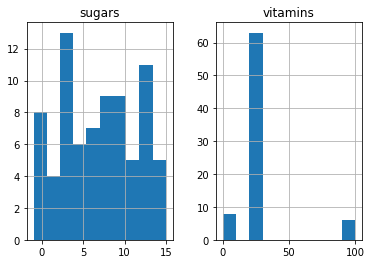

In [9]:
cereals.hist(column=["sugars","vitamins"],bins=10)

##### 2. The names of the manufactures are coded using alphabets, 
  create a new column with their fullname using the below mapping
    
    'N': 'Nabisco',
    'Q': 'Quaker Oats',
    'K': 'Kelloggs',
    'R': 'Raslston Purina',
    'G': 'General Mills' ,
    'P' :'Post' ,
    'A':'American Home Foods Products'
    Create a bar plot where each manufacturer is on the y axis 
    and the height of the bars depict the number of cereals manufactured by them.
    [Hint: Try using countplot this time or bar method of pyplot]

In [30]:
dict={'N': 'Nabisco',
                'Q': 'Quaker Oats',
                'K': 'Kelloggs',
                 'R': 'Raslston Purina',
                'G': 'General Mills' ,
                 'P' :'Post' ,
                  'A':'American Home Foods Products'}
# k=list(dict.keys())
# v=list(dict.values())

In [35]:
# nam=pd.DataFrame(list(zip(k, v)), 
#                columns =['Letter', 'Full Form']) 
# nam

In [34]:
cereals['Full Name'] = cereals['mfr'].map(dict)
cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Full Name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,General Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Raslston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,General Mills


In [66]:
counts=cereals.groupby("Full Name").size().to_frame().reset_index()
counts

,Full Name,0
0,American Home Foods Products,1
1,General Mills,22
2,Kelloggs,23
3,Nabisco,6
4,Post,9
5,Quaker Oats,8
6,Raslston Purina,8


In [70]:
counts.columns="Full Name","Number"
counts

,Full Name,Number
0,American Home Foods Products,1
1,General Mills,22
2,Kelloggs,23
3,Nabisco,6
4,Post,9
5,Quaker Oats,8
6,Raslston Purina,8


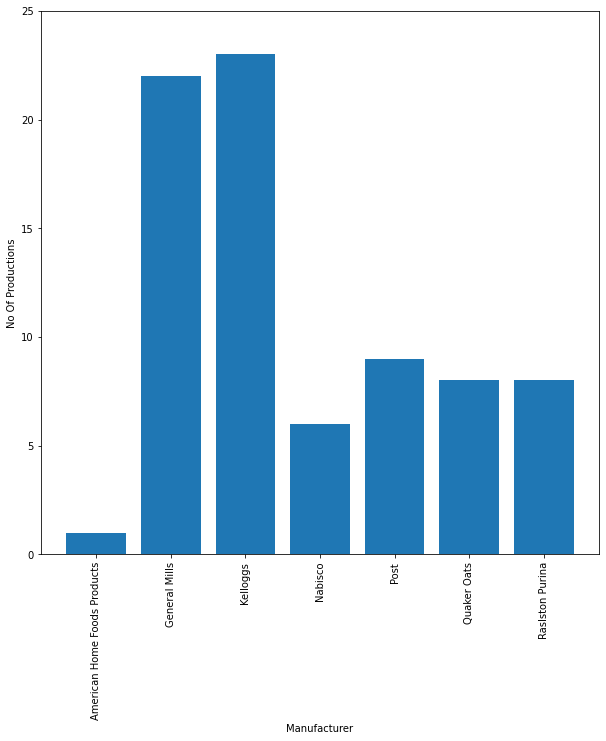

In [75]:
plt.figure(figsize=(10,10))
plt.bar(counts["Full Name"],counts["Number"])
plt.xlabel("Manufacturer")
plt.ylabel("No Of Productions")
plt.xticks( rotation='vertical')
plt.ylim(0, 25)
plt.show()

##### 3. Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’.
      Separate 25% of your data as test set.

In [76]:
cereals.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'Full Name'],
      dtype='object')

In [111]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [112]:
cereals["type"].unique()

array(['C', 'H'], dtype=object)

In [113]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       77 non-null     object 
 1   Full Name  77 non-null     object 
 2   mfr        77 non-null     object 
 3   type       77 non-null     object 
 4   calories   77 non-null     int64  
 5   protein    77 non-null     int64  
 6   fat        77 non-null     int64  
 7   sodium     77 non-null     int64  
 8   fiber      77 non-null     float64
 9   carbo      77 non-null     float64
 10  sugars     77 non-null     int64  
 11  potass     77 non-null     int64  
 12  vitamins   77 non-null     int64  
 13  shelf      77 non-null     int64  
 14  weight     77 non-null     float64
 15  cups       77 non-null     float64
 16  rating     77 non-null     float64
dtypes: float64(5), int64(8), object(4)
memory usage: 9.1+ KB


In [114]:
cereals=cereals[['calories','protein','fat','sodium','fiber','carbo',
                 'sugars','potass','vitamins','shelf','weight','cups','rating']]
cereals.head(10)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [115]:
x=cereals.drop('rating', axis=1)

In [116]:
y=cereals['rating']

In [117]:
cereals.shape

(77, 13)

In [118]:
x.shape

(77, 12)

In [119]:
y.shape

(77,)

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
trainx, testx, trainy, testy = train_test_split(x,y,test_size=0.25, random_state=5)

In [122]:
trainx.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
58,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75
26,100,3,0,0,3.0,14.0,7,100,25,2,1.00,0.80
64,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67
35,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00
21,110,2,0,220,1.0,21.0,3,30,25,3,1.00,1.00


In [123]:
testx.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
40,110,2,1,260,0.0,21.0,3,40,25,2,1.0,1.50
25,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75
10,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75
59,100,3,2,140,2.5,10.5,8,140,25,3,1.0,0.50
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75


In [124]:
trainy.head()

58    39.259197
26    58.345141
64    74.472949
35    21.871292
21    46.895644
Name: rating, dtype: float64

In [125]:
trainx.shape

(57, 12)

##### 4. Fit a linear regression module and measure the mean squared error on test dataset.
    Hint: Explore linear models and metrics section of sklearn documentation]


In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
linearregmodel = LinearRegression()


In [128]:
linearregmodel.fit(trainx, trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
linearmodelprediction = linearregmodel.predict(testx)

In [130]:
testing=pd.DataFrame({'True Value':testy, 'Predicted value':linearmodelprediction})

In [131]:
testing

,True Value,Predicted value
40,39.241114,39.241114
25,31.435973,31.435973
10,18.042851,18.042851
59,39.703400,39.703400
72,39.106174,39.106174
45,34.139765,34.139764
29,28.025765,28.025764
24,32.207582,32.207581
17,35.782791,35.782791
48,29.924285,29.924285


In [132]:
testing["Difference"]=testing["True Value"]-testing["Predicted value"]

In [133]:
testing

,True Value,Predicted value,Difference
40,39.241114,39.241114,-3.944813e-07
25,31.435973,31.435973,3.462234e-07
10,18.042851,18.042851,3.857510e-07
59,39.703400,39.703400,3.595832e-07
72,39.106174,39.106174,-2.656379e-07
45,34.139765,34.139764,6.376075e-07
29,28.025765,28.025764,5.648608e-07
24,32.207582,32.207581,6.603471e-07
17,35.782791,35.782791,3.841196e-07
48,29.924285,29.924285,-1.045221e-07


In [135]:
from sklearn.metrics import mean_squared_error
import math

In [136]:
max(testy)

72.801787

In [137]:
math.sqrt(mean_squared_error(testy, linearmodelprediction))

3.8746119887134624e-07

In [138]:
from sklearn.metrics import r2_score

In [139]:
r2_score(testy, linearmodelprediction)

0.999999999999999